In [2]:
import sys
print("Python path:", sys.executable)
print("Python version:", sys.version)

# Try to import
try:
    import numpy as np
    print("NumPy version:", np.__version__)
except ImportError:
    print("NumPy NOT found")

try:
    import tensorflow as tf
    print("TensorFlow version:", tf.__version__)
except ImportError:
    print("TensorFlow NOT found")

TensorFlow version: 2.20.0


# PART 1

## Task 1: Create Two Sample Tensors

We will create high-dimensional arrays (tensors). Deep learning models often work with 3D or 4D tensors. For example, a batch of color images is 4D:

**Batch Size × Height × Width × Color Channels**

### Explanation:

We will use `np.random.randint` to generate random integers. This is often better for learning than `np.zeros` or `np.ones` because it makes it easier to track how data moves during reshaping or slicing.

In [3]:
# Create two 3-D tensors of shape (2, 3, 4)
# Think of this as: 2 matrices, each having 3 rows and 4 columns
tensor_a = np.random.randint(low=0, high=10, size=(2, 3, 4))
tensor_b = np.random.randint(low=0, high=10, size=(2, 3, 4))

print("Tensor A:\n", tensor_a)
print("\nShape of Tensor A:", tensor_a.shape)

Tensor A:
 [[[6 5 4 3]
  [2 5 1 9]
  [3 5 9 9]]

 [[7 8 2 5]
  [1 3 8 2]
  [6 0 8 7]]]

Shape of Tensor A: (2, 3, 4)


## Task 2: Element-wise Addition

### Explanation:

Element-wise operations apply a mathematical operation between corresponding elements in two tensors. For this to work without "broadcasting" (an advanced topic), the two tensors usually need to have the exact same shape.

Mathematically, if $C = A + B$, then for every specific position $(i, j, k)$:

$$C_{ijk} = A_{ijk} + B_{ijk}$$

In [4]:
# Adding two tensors of the exact same shape
tensor_sum = tensor_a + tensor_b

print("Sum:\n", tensor_sum)

Sum:
 [[[13 11  7 11]
  [ 6  9  3 10]
  [ 6 10 14 16]]

 [[11 17  3 13]
  [10  9 12 11]
  [11  2 12 13]]]


## Task 3: Element-wise Multiplication

### Explanation:

This is often called the **Hadamard Product**. It is **not** the same as Matrix Multiplication (Dot Product).

In element-wise multiplication, we simply multiply the number at position `[0,0,0]` in Tensor A by the number at `[0,0,0]` in Tensor B.

**Symbol:** Often denoted by $\odot$ or simply `*` in code.

**Use case:** Used frequently in neural networks for operations like:
- Masking (hiding certain parts of an image)
- Activation functions
- Attention mechanisms

In [5]:
# Element-wise multiplication
tensor_mult = tensor_a * tensor_b

print("Element-wise Product:\n", tensor_mult)

Element-wise Product:
 [[[42 30 12 24]
  [ 8 20  2  9]
  [ 9 25 45 63]]

 [[28 72  2 40]
  [ 9 18 32 18]
  [30  0 32 42]]]


## Task 4: Reshape a Tensor

### Explanation:

Reshaping is critical in Deep Learning. You might need to flatten an image (2D) into a vector (1D) to feed it into a standard neural network layer.

#### The Golden Rule of Reshaping:
**The total number of elements must remain the same.**

Our `tensor_a` has shape $(2, 3, 4)$.

**Total elements:** $2 \times 3 \times 4 = 24$

We can reshape this into any shape that multiplies to 24, such as:
- $(6, 4)$
- $(24,)$
- $(1, 24)$
- $(2, 2, 6)$
- $(4, 3, 2)$

In [6]:
# Reshaping the (2, 3, 4) tensor into a 2D matrix of shape (6, 4)
reshaped_tensor = tensor_a.reshape(6, 4)

print("Original Shape:", tensor_a.shape)
print("New Shape:", reshaped_tensor.shape)
print("\nReshaped Tensor:\n", reshaped_tensor)

Original Shape: (2, 3, 4)
New Shape: (6, 4)

Reshaped Tensor:
 [[6 5 4 3]
 [2 5 1 9]
 [3 5 9 9]
 [7 8 2 5]
 [1 3 8 2]
 [6 0 8 7]]


## Task 5: Slicing and Indexing

### Explanation:

Slicing allows you to extract specific sub-sections of your tensor. The syntax follows `[start:stop:step]`.

#### Key Syntax Rules:
- `:` selects everything in that dimension
- `0:2` selects indices 0 up to (but not including) 2
- You can omit values: `:` is same as `0:`, `:3` selects first 3 elements

#### 3D Tensor Structure:
Since our tensor is 3D with dimensions **(Block, Row, Column)**, we need:
- Three indices to access a specific element (e.g., `tensor[0, 1, 2]`)
- Ranges to access chunks (e.g., `tensor[0, 0:2, :]`)

#### Examples:
```python
# Get first block, first 2 rows, all columns
slice_example = tensor_a[0, 0:2, :]

# Get all blocks, all rows, first 3 columns
slice_example = tensor_a[:, :, 0:3]

# Get every other block
slice_example = tensor_a[::2, :, :]

In [7]:
# Select the first block, first 2 rows, and all columns
# Syntax: tensor[dimension_1, dimension_2, dimension_3]
slice_example = tensor_a[0, 0:2, :]

print("Original Shape:", tensor_a.shape)
print("Sliced Shape:", slice_example.shape)
print("\nSliced Data:\n", slice_example)

Original Shape: (2, 3, 4)
Sliced Shape: (2, 4)

Sliced Data:
 [[6 5 4 3]
 [2 5 1 9]]


## Task 6: Combining Tensors

### Explanation:

In Neural Networks, you often need to merge data. For example:
- Merging two different features of a dataset
- Combining outputs from multiple network branches
- Batch processing of multiple samples

### Two Main Methods:

#### 1. Concatenation
Joins tensors **along an existing axis**. The dimension of that axis increases.

Example: Concatenating two `(2, 3, 4)` tensors along axis=0 gives `(4, 3, 4)`

#### 2. Stacking
Joins tensors **along a new axis**. The rank (number of dimensions) increases.

Example: Stacking two `(2, 3, 4)` tensors gives `(2, 2, 3, 4)` (new axis at position 0)

### In This Task:
We will use `np.concatenate`. If we concatenate along `axis=0`, we are adding more "blocks" to our pile.

#### Syntax:
```python
# Concatenate along axis 0 (stack vertically)
combined = np.concatenate((tensor_a, tensor_b), axis=0)

# Result: (2,3,4) + (2,3,4) → (4,3,4)

In [8]:
# Concatenating along axis 0 (stacking them on top of each other vertically)
# (2,3,4) + (2,3,4) -> (4,3,4)
combined_tensor = np.concatenate((tensor_a, tensor_b), axis=0)

print("Shape after concatenation:", combined_tensor.shape)

Shape after concatenation: (4, 3, 4)


## Task 7: Splitting Tensors

### Explanation:

This is the inverse of concatenation. You might use this to:
- Split a dataset into "Training" and "Testing" sets
- Divide batches for parallel processing
- Separate features for different processing paths

`np.array_split` allows us to divide the tensor into equal (or near-equal) chunks.

#### Key Function:
```python
np.array_split(array, indices_or_sections, axis=0)

In [9]:
# Split the large combined tensor into 2 equal parts
# We combined them earlier, now we split them back
split_tensors = np.array_split(combined_tensor, 2, axis=0)

print("Shape of first split:", split_tensors[0].shape)
print("Shape of second split:", split_tensors[1].shape)

Shape of first split: (2, 3, 4)
Shape of second split: (2, 3, 4)


## Task 8: Basic Mathematical Operations

### Explanation:

These are **"Aggregation" functions**. They take a tensor and reduce it to a smaller shape (or a single number) by summarizing the data.

#### Common Aggregation Functions:

##### 1. `sum()`
Adds everything up.
```python
total = np.sum(tensor)  # Global sum

##### 2. `mean()`
Adds everything up.
```python
average = np.mean(tensor)  # Global mean


##### 1. `std()`
Adds everything up.
```python
total = np.std(tensor)  # Global std

In [10]:
# Global aggregation (reduces to a single number)
total_sum = np.sum(tensor_a)
mean_val = np.mean(tensor_a)

# Aggregation along an axis (reduces dimensions)
# Summing along axis 0 collapses the two "blocks" together
sum_axis_0 = np.sum(tensor_a, axis=0)

print(f"Total Sum: {total_sum}")
print(f"Mean Value: {mean_val}")
print(f"Sum along Axis 0 shape: {sum_axis_0.shape}") # Should be (3, 4)

Total Sum: 118
Mean Value: 4.916666666666667
Sum along Axis 0 shape: (3, 4)


# TASK 2

### We will use Keras, which is the high-level API built into TensorFlow. Keras makes deep learning accessible by abstracting away the complex mathematics of tensor calculus, allowing you to focus on the architecture.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

## Step 1: Define a Simple Neural Network Model


### Key Components Explained:

#### 1. `Sequential()`
Creates a linear stack of layers. Data flows sequentially from input to output through each layer in order.

#### 2. `Dense`
A **fully connected layer**. Every neuron in this layer is connected to every neuron in the previous layer.

#### 3. `Units`
The number of **neurons (nodes)** in that layer.
- **More units** = More capacity to learn complex patterns
- **More units** = Higher computational cost and risk of overfitting
- Typical range: 16-512 neurons per layer

#### 4. `ReLU` (Rectified Linear Unit)
The standard activation function for hidden layers:
$$f(x) = \max(0, x)$$

**Benefits:**
- Computationally efficient (simple max operation)
- Helps prevent the **"vanishing gradient"** problem
- Introduces non-linearity while keeping gradients large for positive inputs

#### 5. `Sigmoid`
Used for binary classification output:
$$f(x) = \frac{1}{1 + e^{-x}}$$

**Characteristics:**
- Forces the output to be a probability between **0 and 1**
- Interpretable as confidence scores
- Used in the final layer for binary classification tasks

---




In [19]:
# Initialize the container (the empty stack)
model = models.Sequential()

# 1. Add the first hidden layer
# - units=16: This layer has 16 neurons ("thinking units").
# - activation='relu': Rectified Linear Unit. It turns negative values to 0. 
# - input_shape=(8,): We expect an input vector with 8 features.
model.add(layers.Input(shape=(8,)))
model.add(layers.Dense(units=16, activation='relu'))

# 2. Add a second hidden layer
# We don't need input_shape here; Keras infers it from the previous layer.
model.add(layers.Dense(units=8, activation='relu'))

# 3. Add the output layer
# - units=1: A single number output (e.g., probability of "True")
# - activation='sigmoid': Squashes the output between 0 and 1.
model.add(layers.Dense(units=1, activation='sigmoid'))

## Step 2: Compile the Model

### In-Depth Explanation:

Defining the architecture (Step 1) is like building a car. Compiling is like connecting the engine, filling the gas tank, and installing the GPS. You are configuring how the model will learn.

You must specify three things:

### Optimizer: The mechanic.
It updates the weights based on the data to reduce error. Adam is the industry standard (it's adaptive and fast).

### Loss Function: The GPS.
It calculates how far off the model's predictions are from the actual answers.

- Use binary_crossentropy for Yes/No tasks.
- Use categorical_crossentropy for Multi-class tasks.
- Use mean_squared_error for Regression (predicting prices, temp).

### Metrics: The dashboard.
These are numbers for us (humans) to read, like "Accuracy". The model doesn't use this for learning, just for reporting.


**Optimizer ('adam'):** A gradient descent algorithm that adjusts the learning rate automatically. It is generally the best "default" choice.

**Loss ('binary_crossentropy'):** The math formula that quantifies "error" for binary classification tasks. The goal of training is to minimize this number.

**Metrics ('accuracy'):** The percentage of correct predictions. Easier for humans to understand than the raw loss value.

In [13]:
# Compiling the model
model.compile(
    # a more set gradient descent that adjusts the learning rate automatically
    optimizer='adam',
    #quantifies the error for binary classification tasks
    loss='binary_crossentropy',
    # we want to get the accuracy
    metrics=['accuracy']
)

## Step 3: Print Model Summary

### In-Depth Explanation:

The `summary()` method is a crucial debugging tool. It prints a table showing the structure of your network.

**Key things to look for:**

**Output Shape:** It will look like `(None, 16)`. The `None` represents the Batch Size. The model doesn't care if you feed it 1 example or 100 examples at once; it's flexible. The `16` is the number of neurons in that layer.

**Param # (Parameters):** This is the total number of "knobs" the model can turn to learn patterns.

**Calculation:** For a Dense layer, parameters = $(Inputs \times Neurons) + Bias$.

**Example for our first layer:** 8 inputs $\times$ 16 neurons + 16 biases = $128 + 16 = 144$ parameters.

In [14]:
# View the architecture and parameter count
model.summary()

 Non-trainable params: 0 (0.00 B)

# PART 3- Classification Tasks: Build and train a fully connected neural network for classification tasks using first MNIST and then IMDb datasets by repeating the eight steps below:

# Part A: MNIST (Image Classification)

**Objective**: Classify 28x28 pixel grayscale images of handwritten digits (0-9) into their respective categories.

## Step 1: Load and Preprocess the Dataset

**Explanation**:
- **Loading**: We use Keras to load the MNIST dataset, which contains 60,000 training images and 10,000 test images.
- **Normalization**: Pixel values range from 0 to 255. We divide by 255.0 to scale them into the range [0, 1]. This helps the neural network converge faster and prevents "exploding gradients."

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(f"Training Data Shape: {train_images.shape}")
print(f"Test Data Shape: {test_images.shape}")

Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


## Step 2: Define the Neural Network Model

**Explanation**:
- **Flatten**: Transforms the 2D image (28×28) into a 1D array (784 pixels). This is necessary because standard Dense layers expect flat vectors.
- **Dense (Hidden)**: A layer with 128 neurons and ReLU activation to learn non‑linear patterns.
- **Dense (Output)**: A layer with 10 neurons (one for each digit). We use Softmax activation to output a probability distribution across the 10 classes (sum of outputs = 1).

In [16]:
model_mnist = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/clauds/anaconda3/envs/tf_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 3: Compile the Model

**Explanation**:
- **Optimizer (Adam)**: An adaptive learning rate optimization algorithm.
- **Loss (Sparse Categorical Crossentropy)**: Used when classes are mutually exclusive (e.g., a digit cannot be both 1 and 2) and labels are integers.
- **Metrics**: We track accuracy to interpret performance easily.

In [17]:
model_mnist.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

## Step 4: Train the Model

**Explanation**: We train for 5 epochs using 20% of the training data for validation. The history object captures the loss and accuracy metrics at the end of each epoch, which is vital for plotting later.

In [18]:
history_mnist = model_mnist.fit(train_images, train_labels,
                                epochs=5,
                                validation_split=0.2)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9856 - loss: 0.0491 - val_accuracy: 0.9735 - val_loss: 0.0917


## Step 5: Evaluate Model & Plot Performance Indicators

**Explanation**: We utilize matplotlib to define a reusable function for plotting. This allows us to compare Training vs. Validation performance side-by-side.

In [1]:
def plot_history(history, title_prefix=""):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'{title_prefix} Training and validation accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{title_prefix} Training and validation loss')
    plt.legend()

    plt.show()

## Steps 6 & 7: Plot Loss and Accuracy over Epochs

**Explanation**: We call our function to visualize the MNIST training.

**Ideal result**: Accuracy increases, Loss decreases. Validation lines should track closely with Training lines.

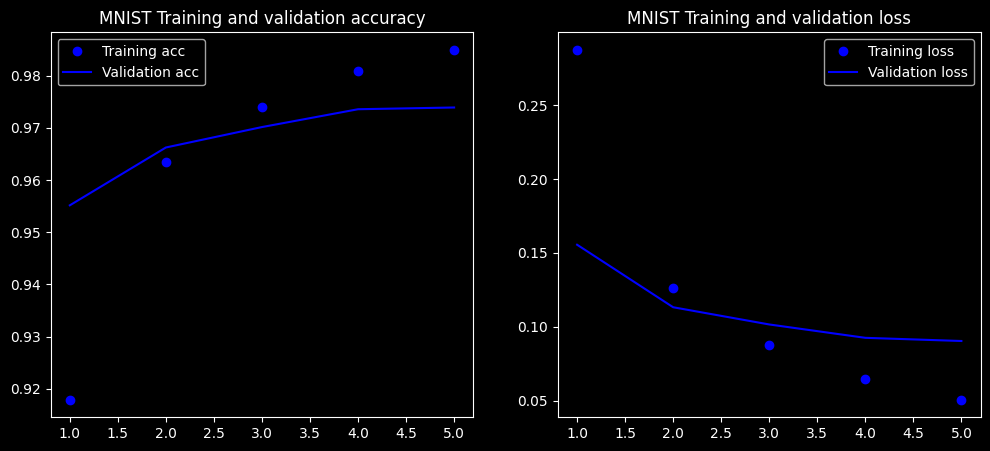

In [19]:
plot_history(history_mnist, title_prefix="MNIST")

## Step 8: Display Test Loss and Accuracy

**Explanation**: Finally, we check how the model performs on the Test Set—data it has never seen before. This is the true measure of the model's ability to generalize.

In [20]:
test_loss, test_acc = model_mnist.evaluate(test_images, test_labels, verbose=2)
print(f'\nMNIST Test accuracy: {test_acc:.4f}')


MNIST Test accuracy: 0.9738


# Part B: IMDb (Text Classification)

**Objective**: Classify movie reviews as either Positive (1) or Negative (0) based on the text.

## Step 1: Load and Preprocess the Dataset

**Explanation**:
- **Vocabulary**: We limit the dataset to the top 10,000 most frequently used words. Less common words are discarded to keep the model manageable.
- **Padding**: Neural networks require inputs of the same shape. Since reviews have different lengths (word counts), we use pad_sequences to cut long reviews or add zeros to short ones, ensuring every input is exactly 256 words long.

In [21]:
from tensorflow.keras.preprocessing import sequence

# Load data, keeping only the top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

# Pad sequences so all reviews are length 256
train_data = sequence.pad_sequences(train_data, maxlen=256)
test_data = sequence.pad_sequences(test_data, maxlen=256)

print(f"IMDb Train Shape (padded): {train_data.shape}")

IMDb Train Shape (padded): (25000, 256)


## Step 2: Define the Neural Network Model

**Explanation**:
- **Embedding Layer**: This is crucial for NLP. It converts integer indices (representing words) into dense vectors of fixed size (16). It learns semantic relationships between words during training.
- **GlobalAveragePooling1D**: This averages the vector of the review to a single dimension, handling the variable length of features efficiently.
- **Dense (16, relu)**: Standard hidden processing layer.
- **Dense (1, sigmoid)**: Single output neuron with Sigmoid activation. It squashes the result between 0 and 1 (closer to 0 = Negative, closer to 1 = Positive).

In [22]:
model_imdb = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Step 3: Compile the Model

**Explanation**:
- **Loss (Binary Crossentropy)**: The standard loss function for binary (Yes/No) classification tasks.

In [23]:
model_imdb.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

## Step 4: Train the Model

**Explanation**: We train the model. Note that text models can overfit quickly (where training accuracy hits 100% but validation stalls), so we monitor the validation split closely.

In [24]:
history_imdb = model_imdb.fit(train_data, train_labels,
                              epochs=10,
                              batch_size=512,
                              validation_split=0.2)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8802 - loss: 0.3199 - val_accuracy: 0.8606 - val_loss: 0.3433


## Steps 5, 6 & 7: Evaluate and Plot Performance

**Explanation**: We reuse the plotting function from Part A.

**Observation**: You might notice the Validation Loss starts increasing after a few epochs while Training Loss keeps going down. This is overfitting.

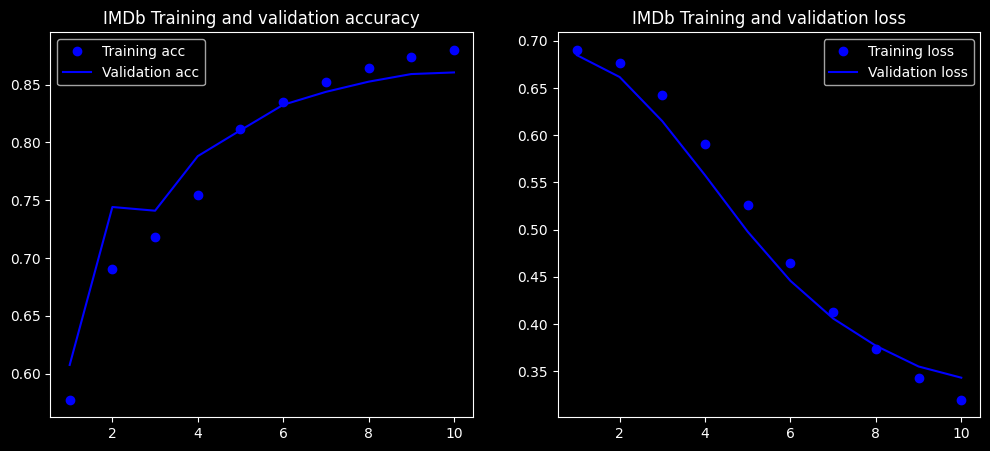

In [25]:
plot_history(history_imdb, title_prefix="IMDb")

## Step 8: Display Test Loss and Accuracy

**Explanation**: Evaluate the final performance on the movie review test set.

In [26]:
results = model_imdb.evaluate(test_data, test_labels, verbose=2)
print(f"\nIMDb Test Accuracy: {results[1]:.4f}")


IMDb Test Accuracy: 0.8576
